# Chapter 4 --- Linear Regression

In [3]:
import numpy as np

import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    


In [4]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


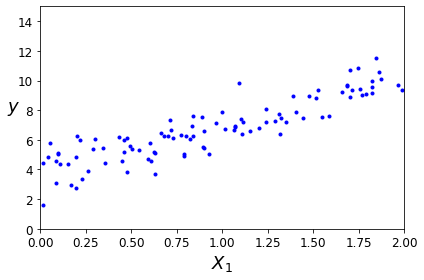

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.76740933],
       [3.16760108]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.76740933],
       [10.10261149]])

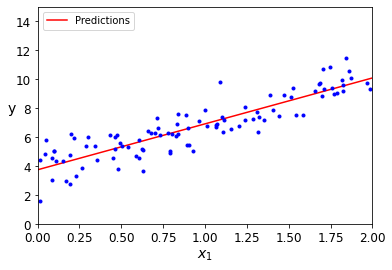

In [8]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.legend(loc="upper left")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.76740933]), array([[3.16760108]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.76740933],
       [10.10261149]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.76740933],
       [3.16760108]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.76740933],
       [3.16760108]])

## Linear regression with gradient descent

### Batch gradient descent

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

In [14]:
theta

array([[-0.26796513],
       [ 0.95194419]])

In [15]:
np.random.randn(2)

array([-0.39890302,  0.37609966])

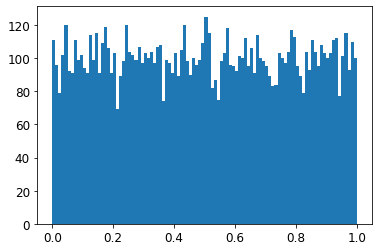

In [16]:
rand_nums = np.random.rand(10000)
plt.hist(rand_nums, bins = 100)
plt.show()

In [17]:
theta_path_bgd = []

In [18]:
for iterationin in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

In [19]:
theta

array([[3.76740933],
       [3.16760108]])

### Stochastic gradient descent

In [20]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [21]:
n_epochs = 50
t_0, t_1 = 5, 50

def learning_schedule(t):
    return t_0 / (t + t_1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta* gradients
        theta_path_sgd.append(theta)

In [22]:
theta

array([[3.78665847],
       [3.11438141]])

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.68860106]), array([3.13321685]))

In [25]:
print("Shape of y raveled: ", y.ravel().shape)
print("Shape of y: ", y.shape)

Shape of y raveled:  (100,)
Shape of y:  (100, 1)


### Mini-batch

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta

array([[3.69129822],
       [3.10870695]])

### Compare the methods

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


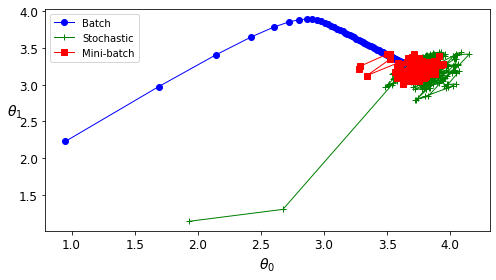

In [29]:
plt.figure(figsize=(7,4))
for theta_path, style, name in zip([theta_path_bgd, theta_path_sgd, theta_path_mgd], 
                                   ['b-o', 'g-+', 'r-s'], ['Batch', 'Stochastic', 'Mini-batch']):
    plt.plot(theta_path[:,0], theta_path[:,1], style,  linewidth=1, label=name)
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

In [30]:
np.random.seed(42)

In [31]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

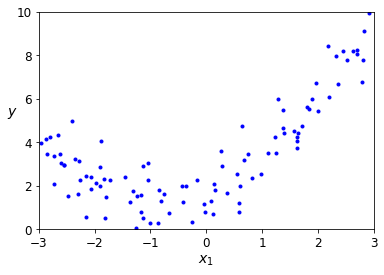

In [32]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3,0, 10])
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

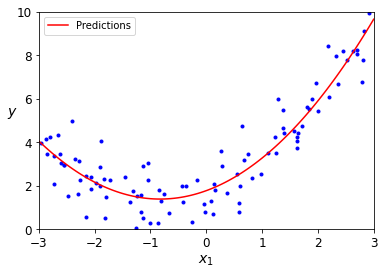

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()


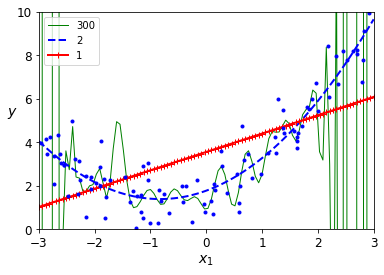

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1,300), ("b--",2,2), ("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_reg.fit(X, y)
    y_newbig = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.axis([-3,3,0,10])
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(val_errors), "b-", label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

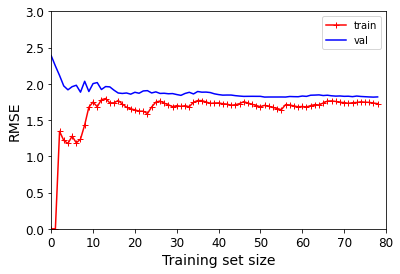

In [38]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0,80,0,3])
plt.show()

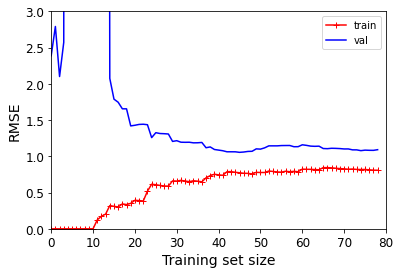

In [39]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_reg, X, y)
plt.axis([0,80,0,3])
plt.show()

## Regularized Models

In [40]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + .5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55071465]])

In [42]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

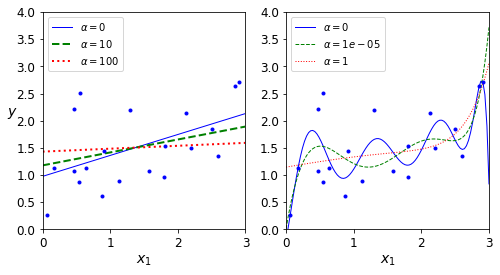

In [43]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),            
                ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha>2 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha={}$".format(alpha))
    plt.plot(X,y, "b.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5, 1), random_state=42)

plt.show()
                        

Ridge regression can also be implemented with a standard SGDREgressor (stochastic gradient descent) with an explicitly defined penalty function

In [44]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-6, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.54693021])

###### Lasso

C:\Users\m4girard\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


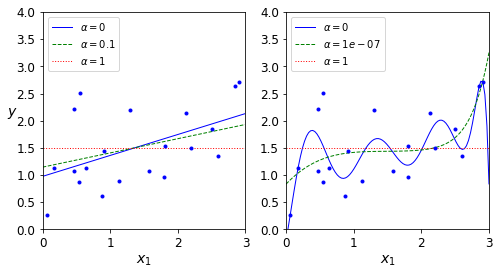

In [45]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-7,1), random_state=42)

plt.show()

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

###### Elastic net

In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

##### Early stopping

In [48]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [49]:
from copy import deepcopy

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch, best_model = None, None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

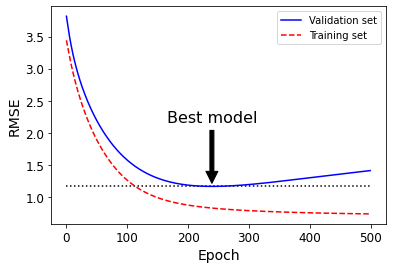

In [50]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
            xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
    )

#best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:")
plt.plot(np.sqrt(val_errors), "b-", label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

In [51]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [53]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1,1], [1,-1], [1,0.5]])
yr = 2* Xr[:,:1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

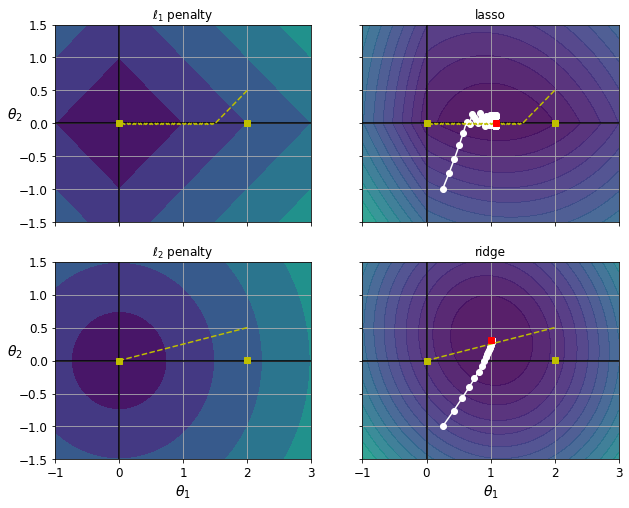

In [59]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations=200):
    path=[theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta*gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "lasso"), (1, N2, 0, 2., "ridge")):
    JR = J + l1*N1 + l2*0.5*N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    levelsJ = (np.exp(np.linspace(0,1,20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0,1,20)) -1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N/2., levels=levelsN)
    ax.plot(path_N[:,0], path_N[:,1], "y--")
    ax.plot(0,0,"ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i+1))
    ax.axis([t1a, t1b, t2a, t2b])
    if i==1:
        ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$',rotation=0)
    
    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:,1], 'w-o')
    ax.plot(path_N[:, 0], path_N[:,1], 'y--')
    ax.plot(0,0,'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.plot(t1r_min, t2r_min, 'rs')
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i==1:
        ax.set_xlabel(r'$\theta_1$')
        
plt.show()

In [65]:
N1.shape

(500, 500)

## Logistic regression

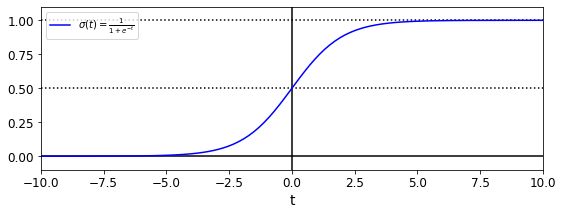

In [70]:
t = np.linspace(-10, 10, 100)
sig = 1/ (1+np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0,0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0,0], [-0.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', label=r'$\sigma(t) = \frac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.axis([-10, 10, -0.1, 1.1])
plt.show()


### Iris

In [73]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [74]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [78]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

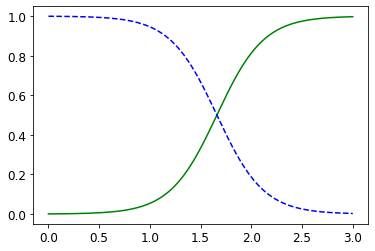

In [80]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not iris virginica')

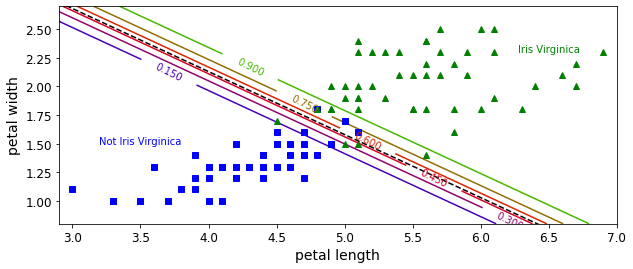

In [82]:
from sklearn.linear_model import LogisticRegression

X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(X,y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 599).reshape(-1,1),
        np.linspace(0.8, 2.7, 200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0]  * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, 'k--')
plt.text(3.5, 1.5, "Not Iris Virginica", color='b', ha='center')
plt.text(6.5, 2.3, "Iris Virginica", color='g', ha='center')
plt.xlabel("petal length")
plt.ylabel('petal width')
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

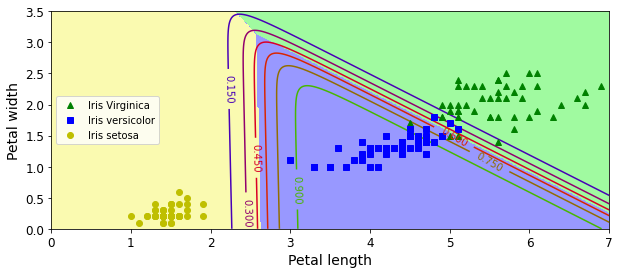

In [87]:
X = iris["data"][:, (2,3)]
y = iris['target']


softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(X,y)

x0, x1 = np.meshgrid(
        np.linspace(0,8, 500).reshape(-1,1),
        np.linspace(0,3.5, 200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2, 1], 'g^', label='Iris Virginica')
plt.plot(X[y==1,0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'yo', label='Iris setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")

plt.axis([0,7,0,3.5])
plt.show()

In [90]:
x0, x1 

(array([[0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        ...,
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01758794, 0.01758794, 0.01758794, ..., 0.01758794, 0.01758794,
         0.01758794],
        [0.03517588, 0.03517588, 0.03517588, ..., 0.03517588, 0.03517588,
         0.03517588],
        ...,
        [3.46482412, 3.46482412, 3.46482412, ..., 3.46482412, 3.46482412,
         3.46482412],
        [3.4

In [96]:
y_proba.shape

(100000, 3)